## Import libraries

In [50]:
#Importing libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


## Customize

In [52]:
#Customise your application 

#Name of the file where you have historical data
myfile='0201 Revenue_day.csv'

#Identify the columns in the data file which has the date and values
date_column='Date'
value_column='Revenue'

# Specify the uncertainty interval
my_interval=0.95

#Name the file where you want to store the forecast values 
forecast_file='0201 forecasted_revenue.csv'

#Name the jpg file where you want tosave the plot 
myplot='0201 forecast_plot.jpg'

## Load data and pre-process

In [54]:
# Load the dataset
data = pd.read_csv(myfile)

# Convert the 'Date' column to datetime format
data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%y')

## Prepare data for Prophet 

In [56]:
# Prepare the data for Prophet (rename columns)
data_prophet = data.rename(columns={date_column: 'ds', value_column: 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model = Prophet(interval_width=my_interval)  
model.fit(data_prophet)

# Create a future dataframe for predictions (e.g., next 50 days)
future = model.make_future_dataframe(periods=50)

# Predict the future values
forecast = model.predict(future)

# Save the forecast to a CSV file
forecast_file_path = forecast_file
forecast.to_csv(forecast_file_path, columns=['ds', 'yhat', 'yhat_lower', 'yhat_upper'], index=False)

19:33:41 - cmdstanpy - INFO - Chain [1] start processing
19:33:42 - cmdstanpy - INFO - Chain [1] done processing


## Plot the forecast

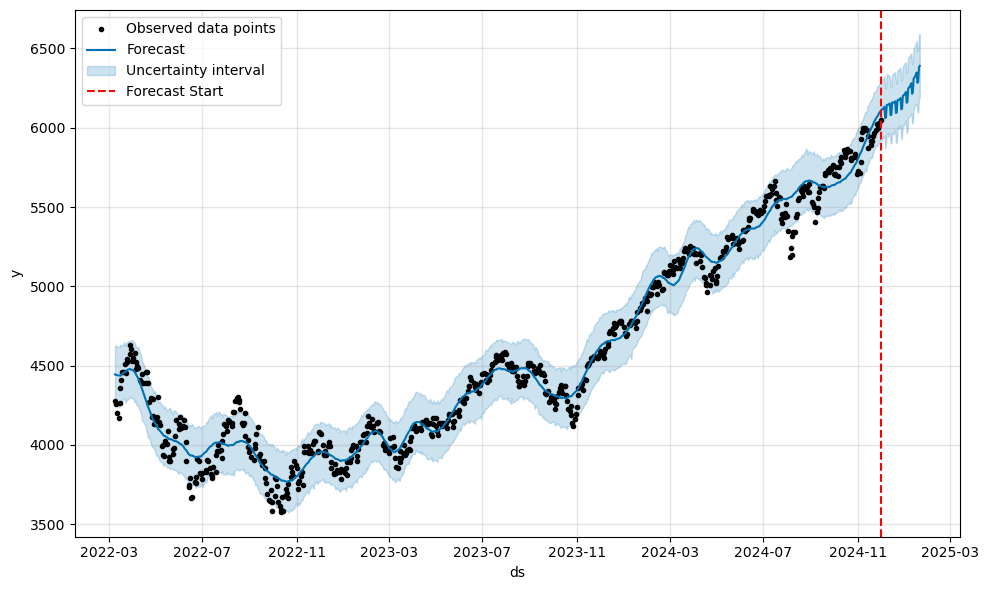

In [58]:
# Plot the forecast
fig = model.plot(forecast)

# Add a vertical line to separate past data from forecasted data
plt.axvline(x=data_prophet['ds'].max(), color='r', linestyle='--', label='Forecast Start')

# Limit the chart to the last 100 days of data plus the forecast
#plt.xlim([data_prophet['ds'].max() - pd.Timedelta(days=100), forecast['ds'].max()])

# Add a legend
plt.legend()

# Save the plot to a JPG file
plt.savefig(myplot, format='jpg')

# Show the plot
plt.show()

## Evaluate the model

In [60]:
# Calculate and print model performance metrics
# Merge the forecast with the actual historical values
historical_forecast = pd.merge(forecast, data_prophet[['ds', 'y']], on='ds', how='left')

# Remove rows where the actual values ('y') are missing (NaN)
historical_forecast = historical_forecast.dropna(subset=['y'])

# Calculate and print model performance metrics
# Compute Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(historical_forecast['y'], historical_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(historical_forecast['y'], historical_forecast['yhat']))

# Print the statistics
print(f"Model Evaluation Statistics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Evaluation Statistics:
Mean Absolute Error (MAE): 74.22
Root Mean Squared Error (RMSE): 94.04
